In [ ]:
from wordcloud.wordcloud import WordCloud #wordcloud 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder #labelecoding 
encoder = LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer #stemming in nltk
ps = PorterStemmer()
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#reading the data in csv file format
df = pd.read_csv('/content/mail.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2885,ham,No probs hon! How u doinat the mo?,NaN,NaN,NaN
3581,ham,You are right. Meanwhile how's project twins c...,NaN,NaN,NaN
1096,spam,Dear Subscriber ur draw 4 å£100 gift voucher w...,NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2'],axis= 1,inplace = True)

In [ ]:
df.drop(['Unnamed: 3'],axis= 1,inplace = True)
df.drop(['Unnamed: 4'],axis= 1,inplace = True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.rename(columns = {'v1':'target'}, inplace = True)

In [ ]:
df.rename(columns = {'v2':'text'}, inplace = True)

In [ ]:
df.rename(columns={'message ':'text'},inplace=True)
df.sample(5)

,target,text
1326,ham,"Sorry, was in the bathroom, sup"
471,ham,"How long has it been since you screamed, princ..."
2490,ham,Dun b sad.. It's over.. Dun thk abt it already...
302,ham,Oh and by the way you do have more food in you...
761,ham,"We are at grandmas. Oh dear, u still ill? I fe..."


In [ ]:
df.rename(columns={'Message':'text'},inplace=True)

In [ ]:
df.rename(columns={'Category':'target'},inplace=True)

In [ ]:
#label encoder wihtout using the encoder
df.loc[df['target'] == 'spam', 'target',] = 0
df.loc[df['target'] == 'ham', 'target',] = 1

In [ ]:
df.sample(5)

,target,text
4410,1,Ya but it cant display internal subs so i gott...
4286,1,I wud never mind if u dont miss me or if u don...
5189,0,ree entry in 2 a weekly comp for a chance to w...
2102,1,Audrie lousy autocorrect
2011,1,Do whatever you want. You know what the rules ...


In [ ]:
df.head(6)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#duplicates number printing
df.duplicated().sum()

403

In [ ]:
#droping the duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
#spam ham count
df['target'].value_counts()

1    4516
0     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

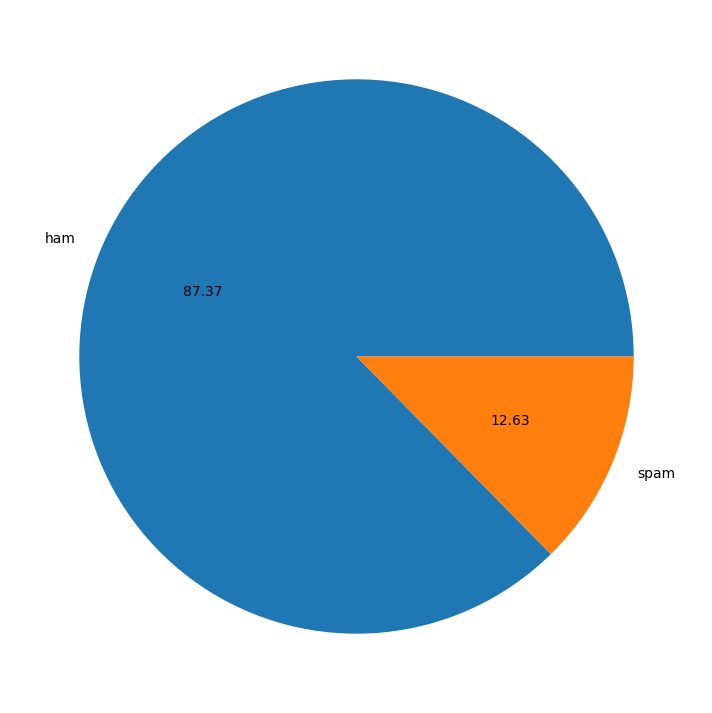

In [ ]:
#piechart showing that data is not balanced
plt.figure(figsize=(15,9))
plt.pie (df['target'].value_counts(), labels=['ham','spam'],autopct="%.2f")
plt.show

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head(5)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['char_count']=df['text'].apply(len)

In [ ]:
df.head(5)

,target,text,char_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['word_count']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,char_count,word_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['sent_count']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,char_count,word_count,sent_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham messages
df[df['target']==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam messages
df[df['target']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
def transform_text(text):
  #lower case 
  text = text.lower()
  #tokenization
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  #punctuation and stopwords removal
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)
  #stemming
  text = y[:]
  y.clear()
  for i in text :
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
#transform_text checking
transform_text('my name is demon of the hidden mist')

'name demon hidden mist'

In [ ]:
#tranformed words
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


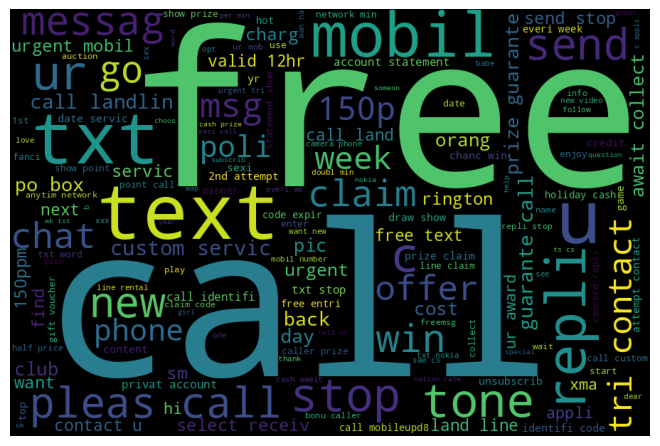

In [ ]:
#word cloud generation for the spam 
from wordcloud import WordCloud
wc = WordCloud(width=900,height=600,min_font_size=10,background_color='black').generate(" ".join(df[df['target']==0]['transformed_text'].astype(str)))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

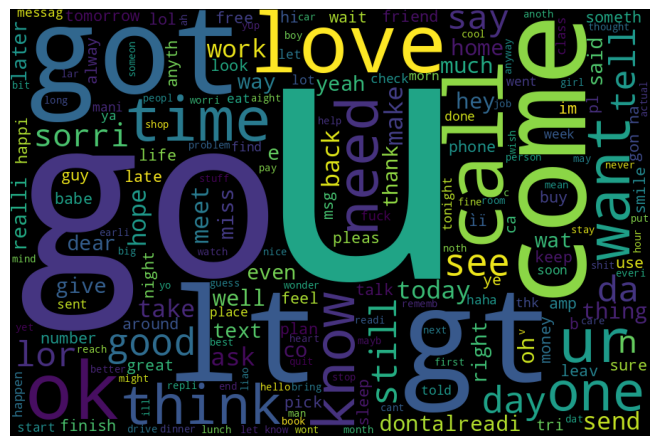

In [ ]:
#word cloud generation for the ham 
wc1 = WordCloud(width=900,height=600,min_font_size=10,background_color='black').generate(" ".join(df[df['target']==1]['transformed_text'].astype(str)))
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#most common words in spam
spam_corpus= [] #empty list
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)#length of spam words

9939

In [ ]:
#counter of all words in spam
(Counter(spam_corpus).most_common(10))

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [ ]:
#most common words in ham
ham_corpus= [] #empty list
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)#length of spam words

35404

In [ ]:
#counter of all words in ham
(Counter(ham_corpus).most_common(10))

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

**ALGORITHMS USED ARE:**

GaussianNB

MultinomialNB

BernoulliNB

LogisticRegression

RandomForestClassifier

DecisionTreeClassifier

KNeighborsClassifier

SVC

GradientBoostingClassifier


In [ ]:
#vectorized as bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#scalling the dataframe using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y=y.astype('int') #array is recognised as object so it is converted to int array


In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2) 

In [ ]:
#importing all the algorithms
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [ ]:
#creating objects for the algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
rfc = RandomForestClassifier()
dt= DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc= SVC()
gbc = GradientBoostingClassifier()
clfs = {
          'gaussianNB': gnb,
          'multinomialNB': mnb,
          'bernoulliNB': bnb,
          'legistic regression':lg,
          'randomforest':rfc,
          'decisontree':dt,
          'knn':knn,
          'supportvectorMachine':svc,
          'gradientBoostingClassifier':gbc
    
        }

In [ ]:
#gaussian naive bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8755641521598968
0.9771054783319706


In [ ]:
#multinomial naive bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9800128949065119
0.9832727272727273


In [ ]:
#bernoulli naive bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9819471308833011
0.9812138728323699


In [ ]:
#Logistic regression
lg.fit(X_train,y_train)
y_pred4 = lg.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9729206963249516
0.9713876967095851


In [ ]:
#random forest
rfc.fit(X_train,y_train)
y_pred5 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9748549323017408
0.9734767025089606


In [ ]:
#decision tree
dt.fit(X_train,y_train)
y_pred6 = dt.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9529335912314636
0.9721203228173148


In [ ]:
#KNearestNeighbour
knn.fit(X_train,y_train)
y_pred7 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred7))
print(precision_score(y_test,y_pred7))

0.9084461637653127
0.906


In [ ]:
#support machine vector
svc.fit(X_train,y_train)
y_pred8 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred8))
print(precision_score(y_test,y_pred8))

0.9780786589297228
0.9762931034482759


In [ ]:
#gradient boosting classifier
gbc.fit(X_train,y_train)
y_pred9 = gbc.predict(X_test)
print(accuracy_score(y_test,y_pred9))
print(precision_score(y_test,y_pred9))

0.9580915538362347
0.9588944011339475


In [ ]:
#creating a funtion that can train models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = [] #array of accuracy score
precision_scores = [] #array of precion score
#for loop to run and calculate precision and accuracy score of all the model
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy*100)
    print("Precision - ",current_precision*100)
    print("-----------")
    #appended and stored in the arrays
    accuracy_scores.append(current_accuracy*100)
    precision_scores.append(current_precision*100)

For  gaussianNB
Accuracy -  87.55641521598967
Precision -  97.71054783319705
-----------
For  multinomialNB
Accuracy -  98.00128949065119
Precision -  98.32727272727273
-----------
For  bernoulliNB
Accuracy -  98.1947130883301
Precision -  98.121387283237
-----------
For  legistic regression
Accuracy -  97.29206963249516
Precision -  97.13876967095851
-----------
For  randomforest
Accuracy -  97.678916827853
Precision -  97.62589928057554
-----------
For  decisontree
Accuracy -  95.09993552546744
Precision -  97.34513274336283
-----------
For  knn
Accuracy -  90.84461637653128
Precision -  90.60000000000001
-----------
For  supportvectorMachine
Accuracy -  97.80786589297227
Precision -  97.62931034482759
-----------
For  gradientBoostingClassifier
Accuracy -  95.74468085106383
Precision -  95.82152974504248
-----------


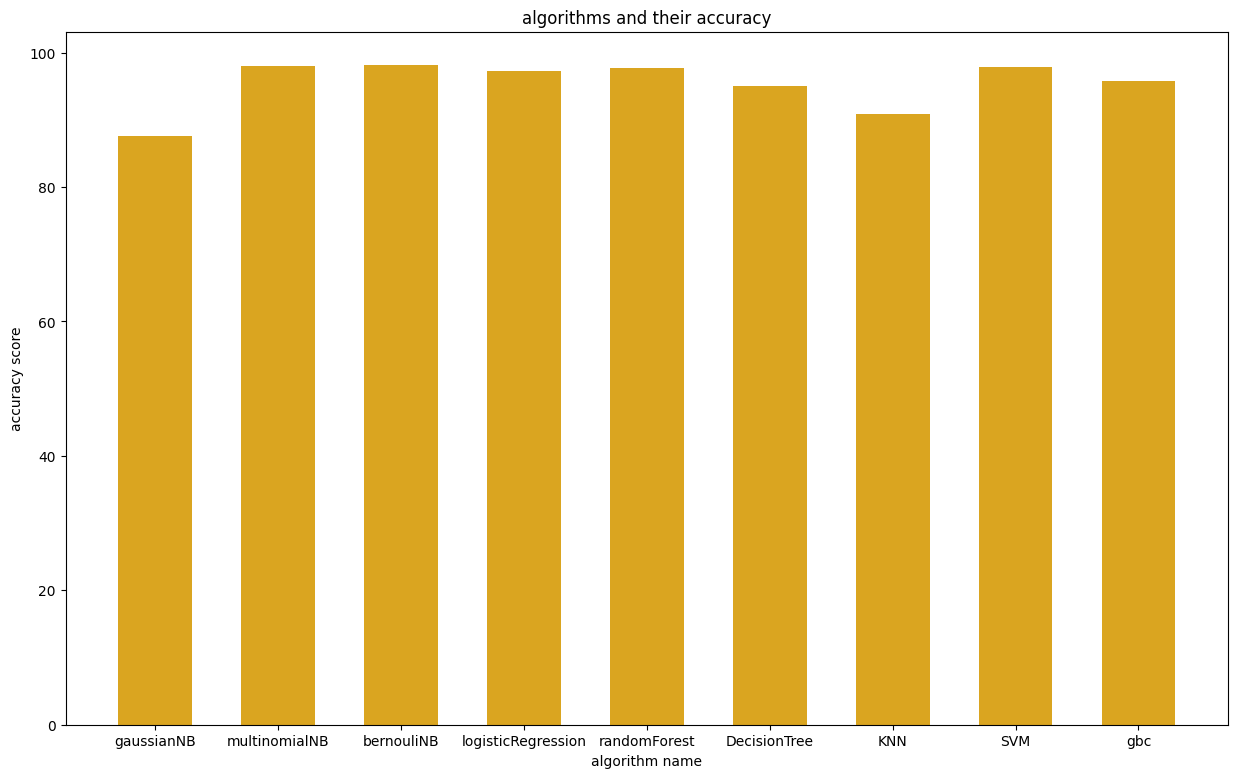

In [ ]:
#creating bar graphs for accuracy of all the models
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.bar(x_axis, accuracy_scores,width=.6,color='goldenrod',edgecolor='none')
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')
plt.show()


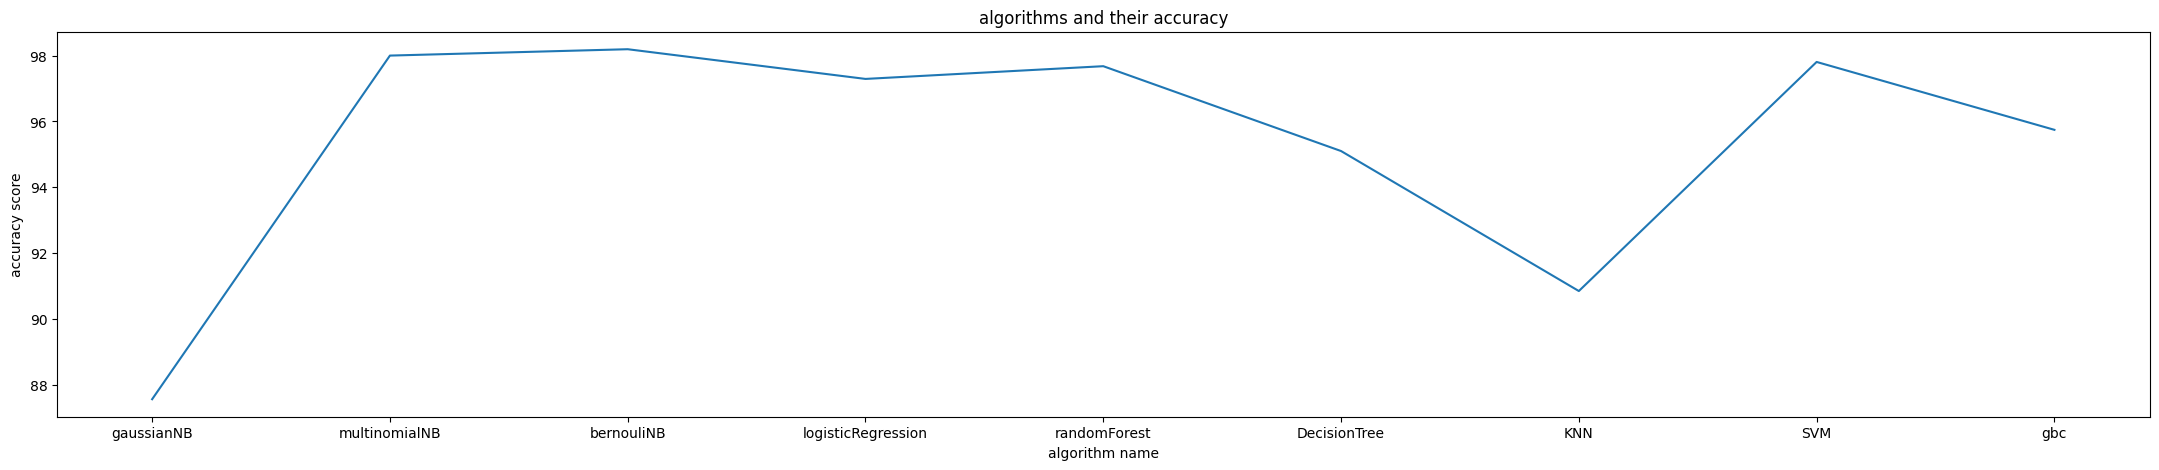

In [ ]:
#creating graphs for accuracy of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.figure(figsize=(27,5))
plt.plot(x_axis,accuracy_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')

plt.show()

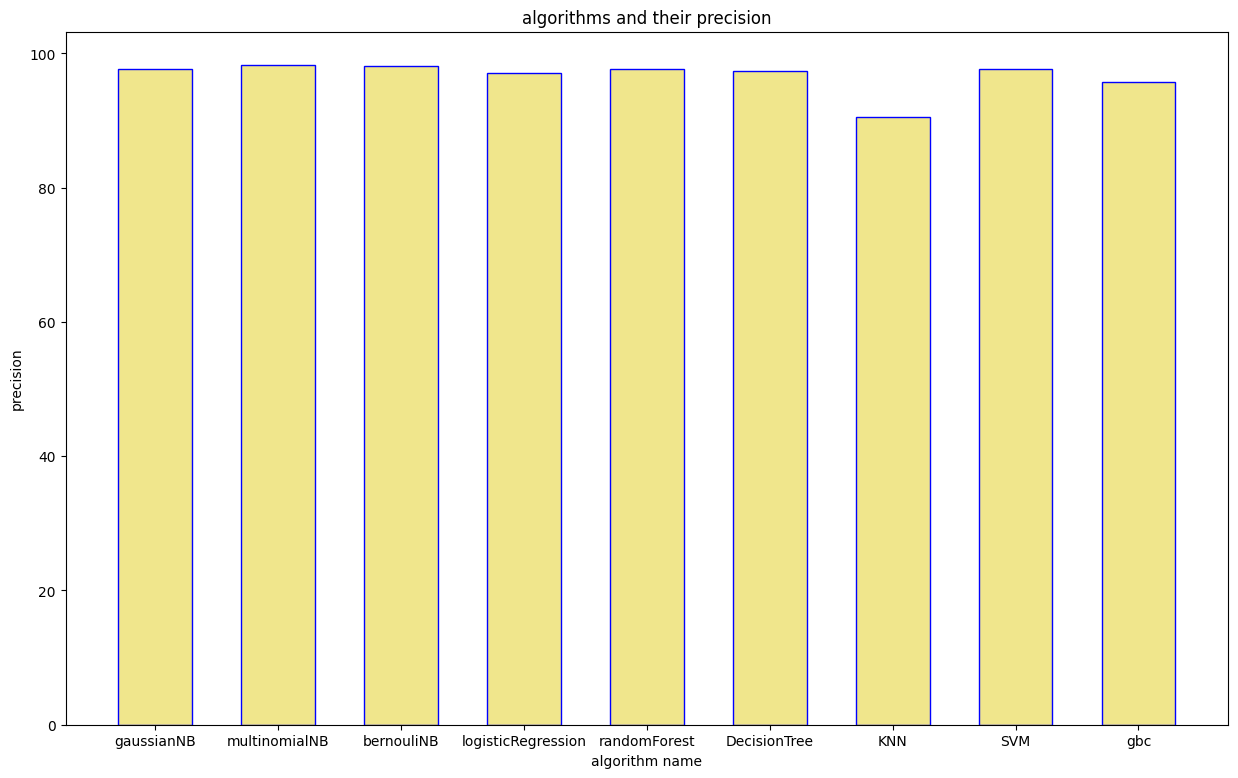

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [ ]:
#creating bar graphs for precision of all the models
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.bar(x_axis,precision_scores,width=.6,color='khaki',edgecolor='blue')
plt.title('algorithms and their precision')
plt.xlabel('algorithm name')
plt.ylabel('precision')
plt.show()
plt.figure(figsize=(8,5))


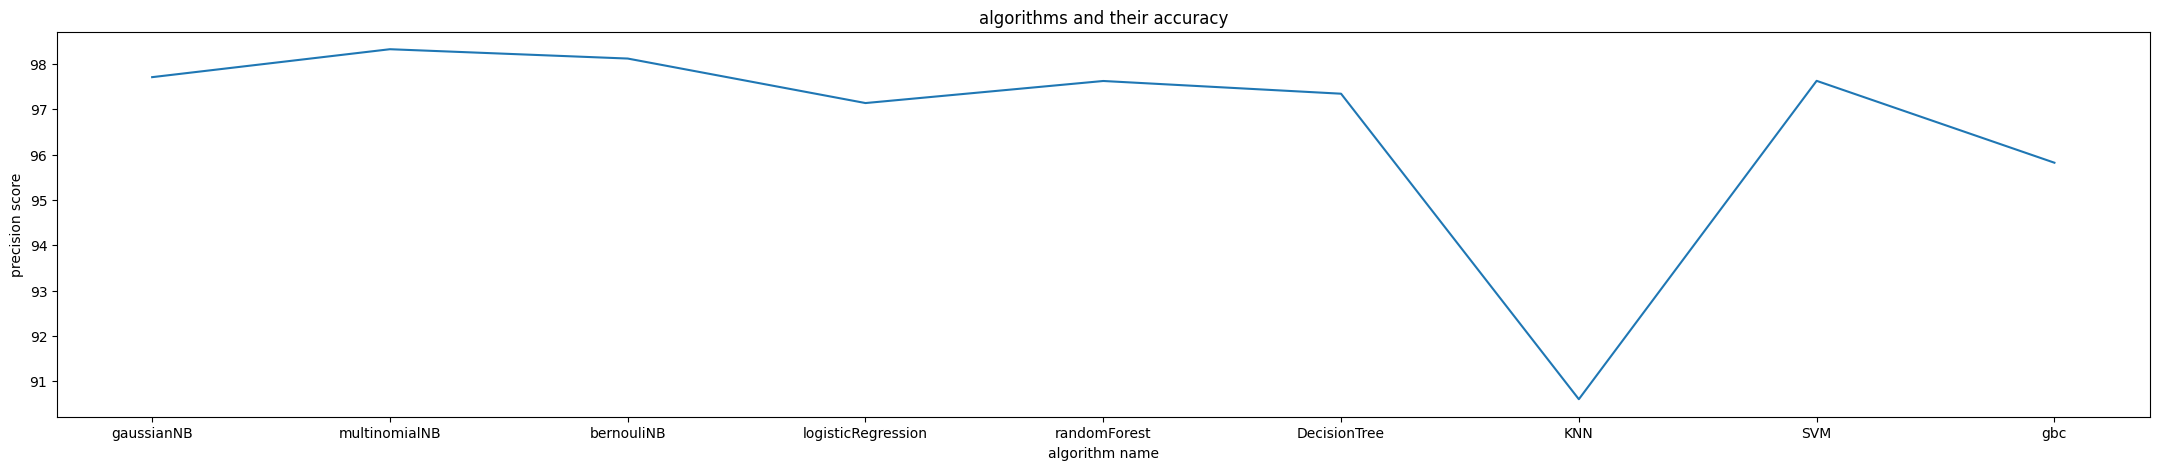

In [ ]:
#creating graphs for precison of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.figure(figsize=(27,5))
plt.plot(x_axis,precision_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('precision score')
plt.show()

In [ ]:
#creating a dataframe 
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,multinomialNB,Accuracy,98.001289
1,bernoulliNB,Accuracy,98.194713
2,gaussianNB,Accuracy,87.556415
3,supportvectorMachine,Accuracy,97.807866
4,randomforest,Accuracy,97.678917
5,decisontree,Accuracy,95.099936
6,legistic regression,Accuracy,97.292070
7,gradientBoostingClassifier,Accuracy,95.744681
8,knn,Accuracy,90.844616
9,multinomialNB,Precision,98.327273


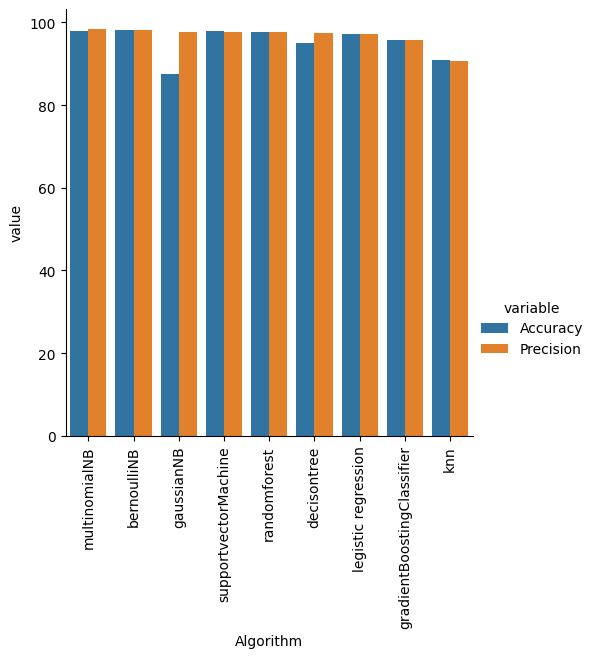

In [ ]:
#comparing the the precision score and the accuracy score of all the models and selecting a model\
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

thus here multinomial naive bayes has the highest combination of accuracy and precison thus it has the best chance of success and thus the final algorithm selected is **Multinomial baive bayes**

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
def hehe(text):
    x=transform_text(text)
    vect=tfidf.transform([x])
    result=mnb.predict(vect)
    if result == 0:
        div="spam"
    else:
        div="ham"
    return div

In [ ]:
demo = gr.Interface(
    fn=hehe, 
    inputs=gr.Textbox(placeholder="Enter a email..."), 
    outputs="label", 
    
    examples=[["enter a email"]])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://11cac5979b8f003ada.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
